# House price prediction using linear regression

In [144]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Load house sales data

In [145]:
data = pd.read_csv("data.csv")
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

## Explore the data for houesing sales

Let's analyse the data and search for a correlation between the variables

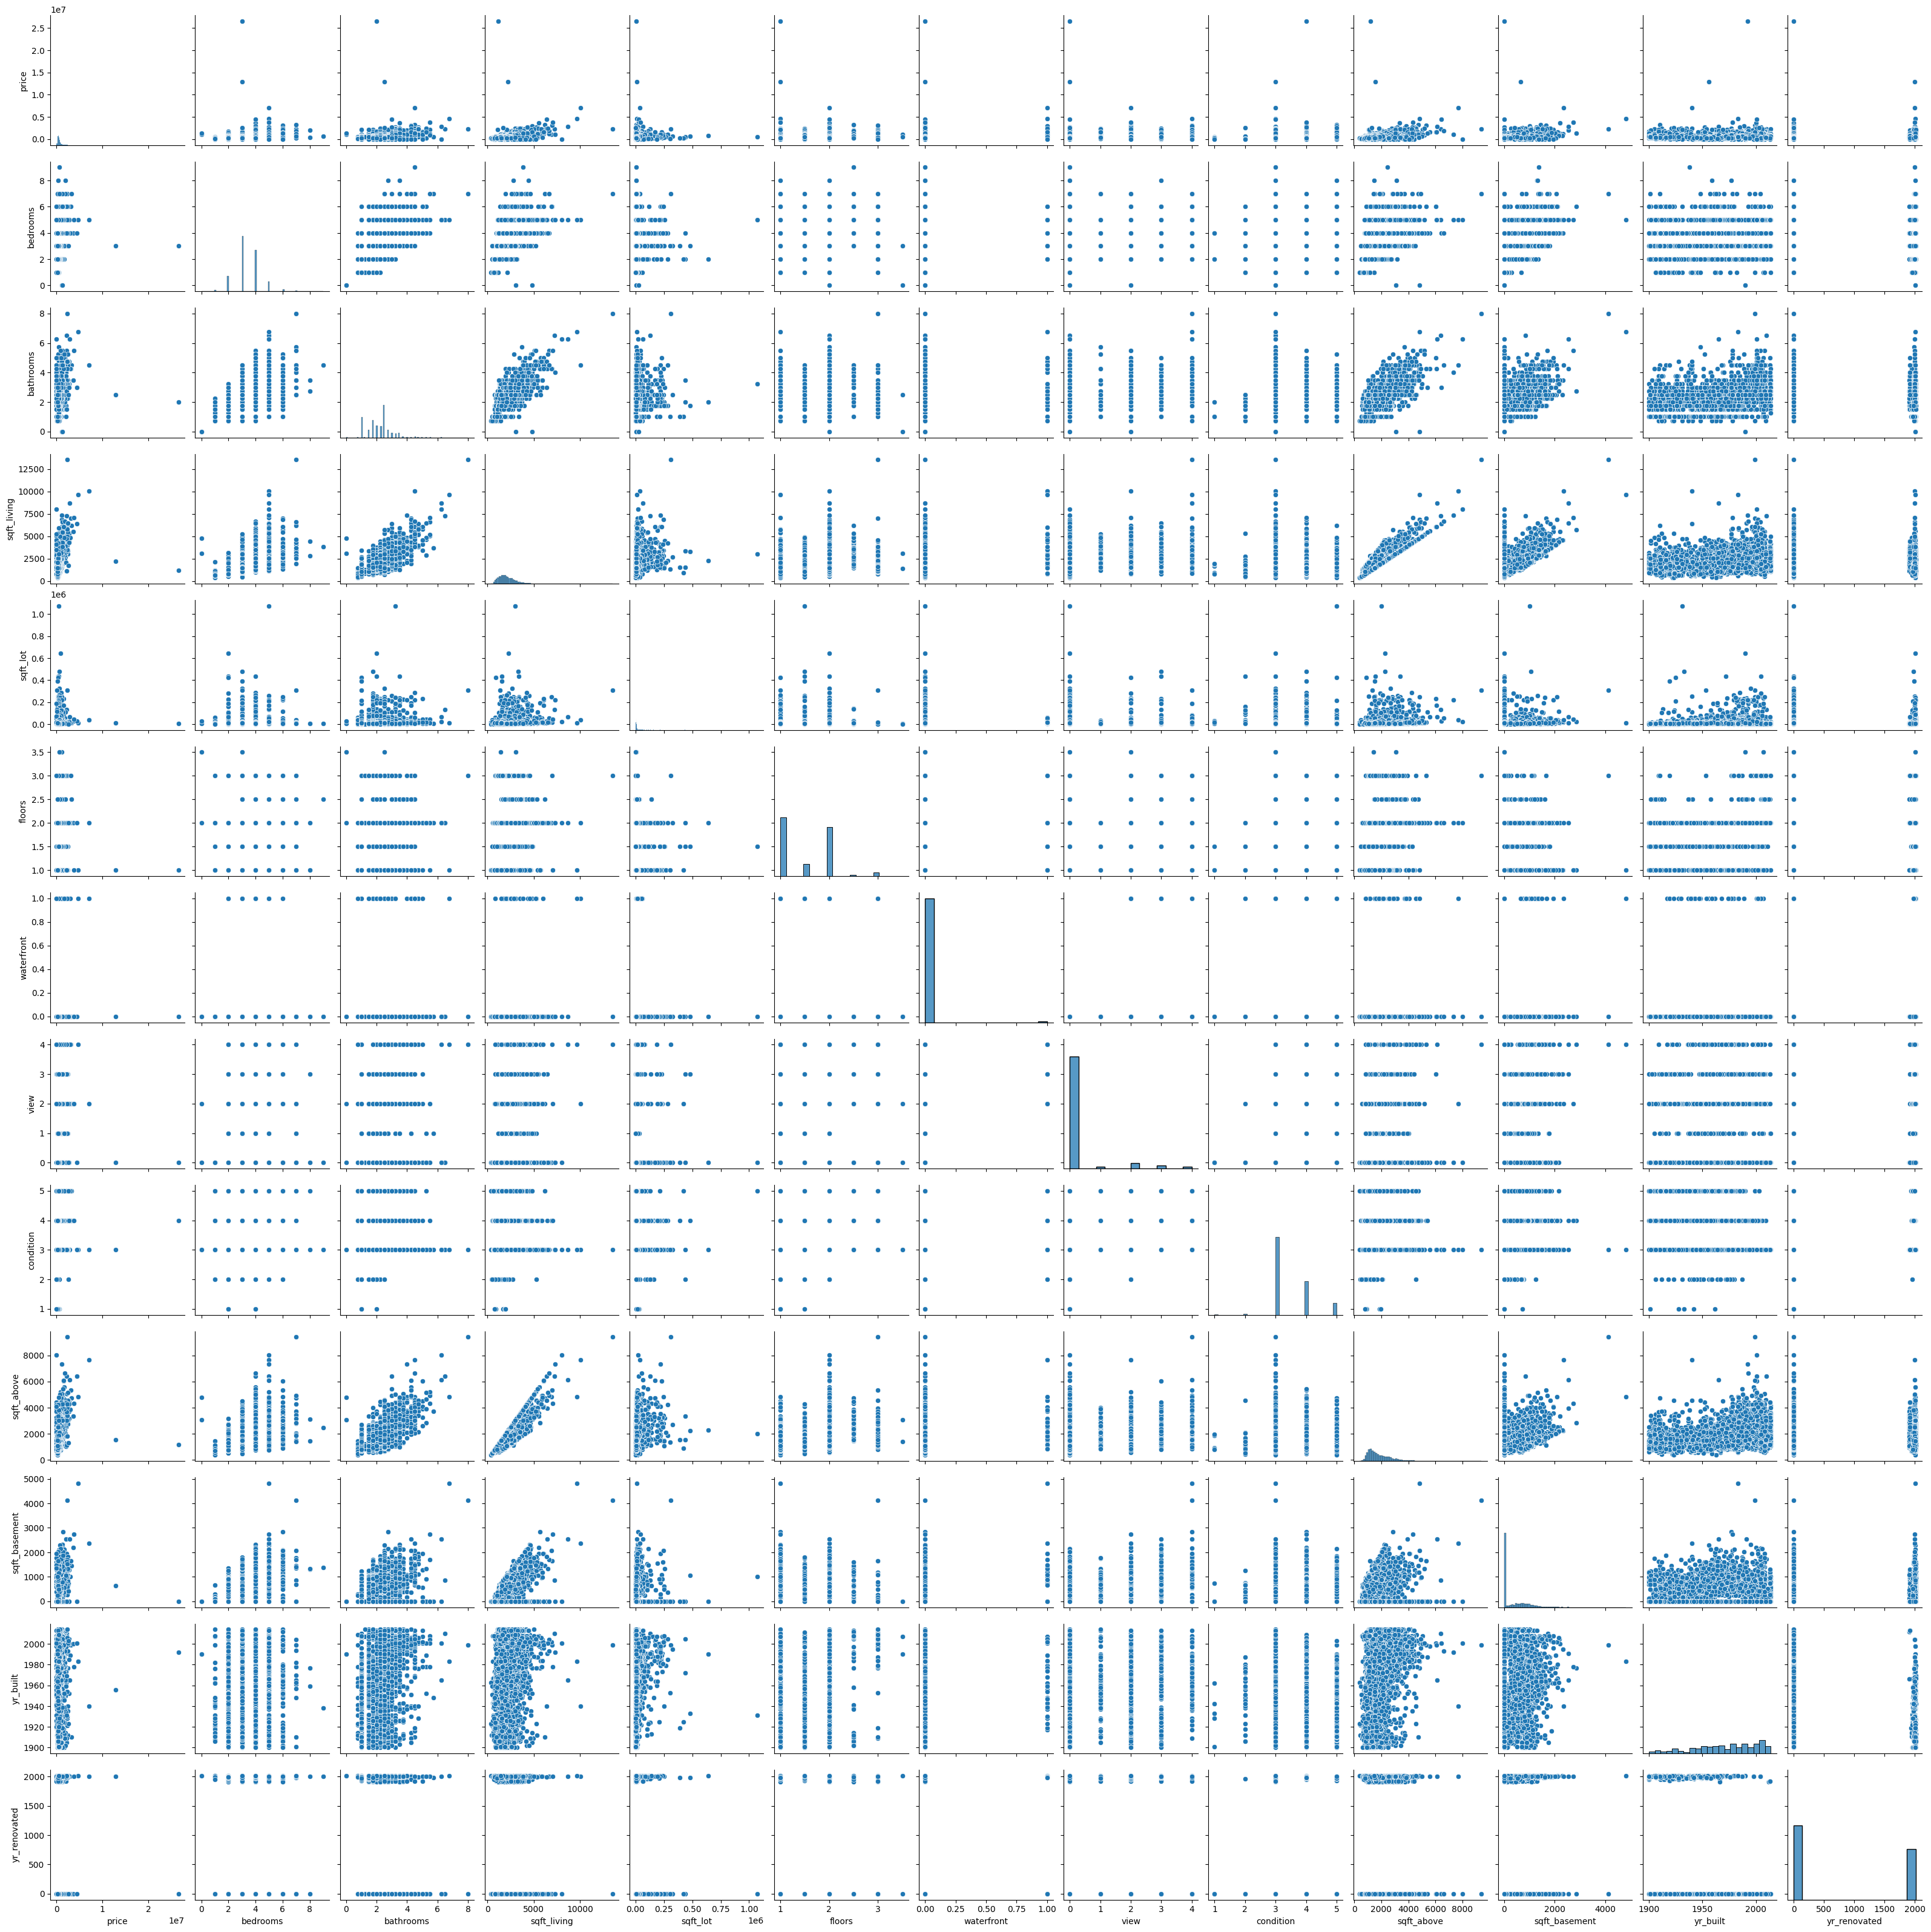

In [147]:
sns.pairplot(data)

<AxesSubplot:>

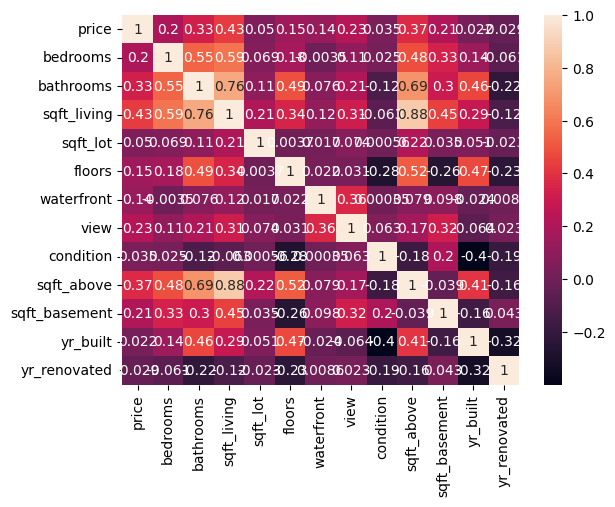

In [148]:
sns.heatmap(data.corr(), annot=True)

In [149]:
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

> We noticed that there is a high correlation between the price and ['bathrooms', 'sqft_living'], therefore we will use this variables to learn our model.

## Create a simple regression model of ['bathrooms', 'sqft_living'] to 'price'

In [150]:
from sklearn.model_selection import train_test_split

X = data[['bathrooms', 'sqft_living']]
y = data[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4 , random_state=000)

## Build the regression model

In [151]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

## Evaluate the simple model

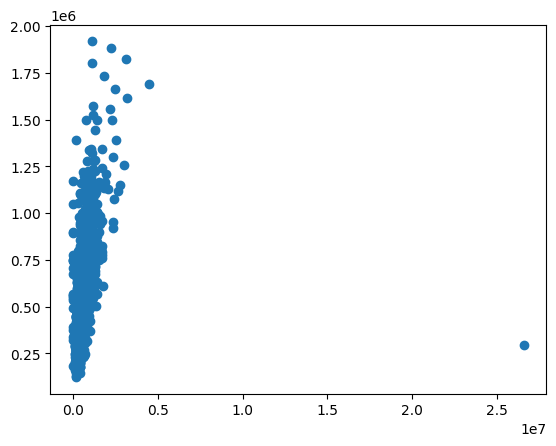

In [152]:
prediction = lm.predict(X_test)

plt.scatter(y_test, prediction)

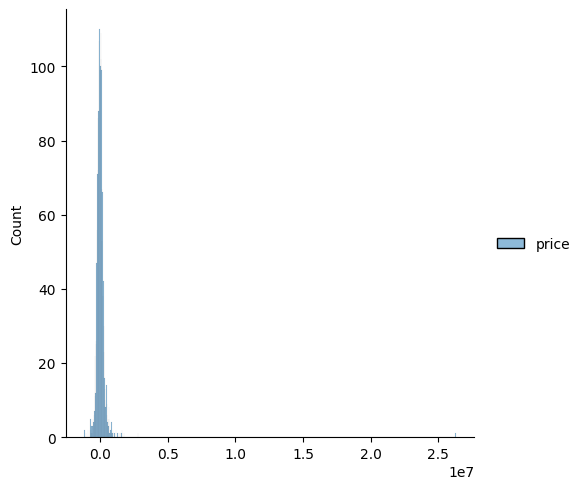

In [153]:
sns.displot((y_test-prediction), bins=1000)

In [154]:
from sklearn.metrics import mean_squared_error


print(np.sqrt(mean_squared_error(prediction, y_test)))

667135.3751189997


## Let's show how our prediction looks like

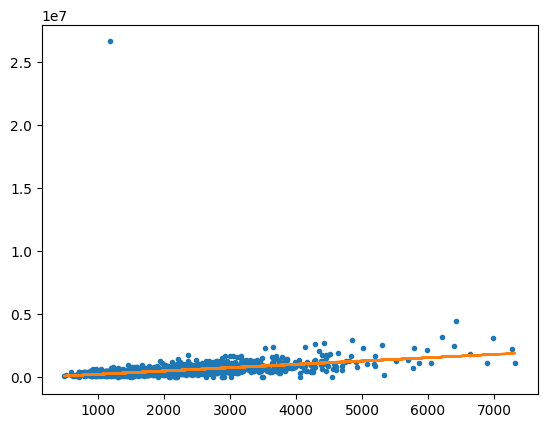

In [155]:
plt.plot(X_test['sqft_living'], y_test, '.', X_test['sqft_living'], prediction, '-')

## Inspecting the model coeffients learned

In [156]:
coeff_data = pd.DataFrame(lm.coef_.transpose(), X.columns, columns=['Coefficient'])

coeff_data

,Coefficient
bathrooms,-8797.743959
sqft_living,267.134400


## Apply the learned model to predict the price of the house

In [163]:
my_house = data.iloc[[0]]
print(my_house)

                  date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00  313000.0       3.0        1.5         1340      7912   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   

   yr_renovated                street       city  statezip country  
0          2005  18810 Densmore Ave N  Shoreline  WA 98133     USA  


The real price of my_house:

In [167]:
print(my_house['price'])

0    313000.0
Name: price, dtype: float64


The predicted price for my_house:

In [166]:
print(lm.predict(my_house[['bathrooms', 'sqft_living']]))

array([[343086.20860635]])

------------------------------
Thank your for reading, till next time :)